In [5]:
import pandas as pd
from apriori_python import apriori

# itemSetList = [['eggs', 'bacon', 'soup'],
#                ['eggs', 'bacon', 'apple'],
#                ['soup', 'bacon', 'banana']]
# freqItemSet, rules = apriori(itemSetList, minSup=0.5, minConf=0.5)
# print(freqItemSet)
# print(rules)

predata = pd.read_csv('BreadBasket_DMS.csv')
print(predata)

data = {}

for i, row in predata.iterrows():
    key = row["Transaction"]
    item = row["Item"]
    if key not in data:
        data[key] = set()

    if item != 'NONE':
        data[key].add(item)

print("ok")

data_list = []
for v in data.values():
    data_list.append(list(v))



             Date      Time  Transaction           Item
0      2016-10-30  09:58:11            1          Bread
1      2016-10-30  10:05:34            2   Scandinavian
2      2016-10-30  10:05:34            2   Scandinavian
3      2016-10-30  10:07:57            3  Hot chocolate
4      2016-10-30  10:07:57            3            Jam
...           ...       ...          ...            ...
21288  2017-04-09  14:32:58         9682         Coffee
21289  2017-04-09  14:32:58         9682            Tea
21290  2017-04-09  14:57:06         9683         Coffee
21291  2017-04-09  14:57:06         9683         Pastry
21292  2017-04-09  15:04:24         9684      Smoothies

[21293 rows x 4 columns]
ok


In [6]:
import time

print("\n>>>> Apriori")
apriori_time = time.time()
freqItemSet, rules = apriori(data_list, minSup=0.01, minConf=0.01)
apriori_time = time.time() - apriori_time 
print(freqItemSet)
print(rules)




>>>> Apriori
{1: {frozenset({'Toast'}), frozenset({'Juice'}), frozenset({'Alfajores'}), frozenset({'Brownie'}), frozenset({'Pastry'}), frozenset({'Scandinavian'}), frozenset({'Scone'}), frozenset({'Sandwich'}), frozenset({'Jam'}), frozenset({'Spanish Brunch'}), frozenset({'Chicken Stew'}), frozenset({'Hearty & Seasonal'}), frozenset({'Jammie Dodgers'}), frozenset({'Bread'}), frozenset({'Truffles'}), frozenset({'Tea'}), frozenset({'Salad'}), frozenset({'Cookies'}), frozenset({'Mineral water'}), frozenset({'Coke'}), frozenset({'Medialuna'}), frozenset({'Soup'}), frozenset({'Cake'}), frozenset({'Coffee'}), frozenset({'Farm House'}), frozenset({'Tiffin'}), frozenset({'Baguette'}), frozenset({'Muffin'}), frozenset({'Fudge'}), frozenset({'Hot chocolate'})}, 2: {frozenset({'Coffee', 'Cake'}), frozenset({'Coffee', 'Juice'}), frozenset({'Sandwich', 'Coffee'}), frozenset({'Medialuna', 'Bread'}), frozenset({'Sandwich', 'Tea'}), frozenset({'Alfajores', 'Bread'}), frozenset({'Pastry', 'Bread'}), f

In [7]:
from efficient_apriori import apriori as ef_ap
ef_apriori_time = time.time()
item_set, rules = ef_ap(data_list, min_support=0.01, min_confidence=0.01)
ef_apriori_time = time.time() - ef_apriori_time
print("\n>>>> Effiecient apriori")
print(item_set)
print(rules)




>>>> Effiecient apriori
{1: {('Bread',): 3097, ('Scandinavian',): 275, ('Jam',): 142, ('Cookies',): 515, ('Hot chocolate',): 552, ('Muffin',): 364, ('Pastry',): 815, ('Coffee',): 4528, ('Medialuna',): 585, ('Tea',): 1350, ('Mineral water',): 134, ('Farm House',): 371, ('Fudge',): 142, ('Juice',): 365, ('Hearty & Seasonal',): 100, ('Soup',): 326, ('Cake',): 983, ('Coke',): 184, ('Sandwich',): 680, ('Alfajores',): 344, ('Brownie',): 379, ('Truffles',): 192, ('Jammie Dodgers',): 125, ('Tiffin',): 146, ('Toast',): 318, ('Scone',): 327, ('Salad',): 99, ('Chicken Stew',): 123, ('Spanish Brunch',): 172, ('Baguette',): 152}, 2: {('Alfajores', 'Bread'): 98, ('Alfajores', 'Coffee'): 186, ('Bread', 'Brownie'): 102, ('Bread', 'Cake'): 221, ('Bread', 'Coffee'): 852, ('Bread', 'Cookies'): 137, ('Bread', 'Hot chocolate'): 127, ('Bread', 'Medialuna'): 160, ('Bread', 'Pastry'): 276, ('Bread', 'Sandwich'): 161, ('Bread', 'Tea'): 266, ('Brownie', 'Coffee'): 186, ('Cake', 'Coffee'): 518, ('Cake', 'Hot ch

In [8]:
from fpgrowth_py import fpgrowth
fpgrowth_time = time.time()
item_set, rules = fpgrowth(data_list, minSupRatio=0.01, minConf=0.01)
fpgrowth_time = time.time() - fpgrowth_time
print("\n>>>> Fpgrowth")
print(item_set)
print(rules)

print("End")


>>>> Fpgrowth
[{'Salad'}, {'Hearty & Seasonal'}, {'Chicken Stew'}, {'Jammie Dodgers'}, {'Mineral water'}, {'Jam'}, {'Fudge'}, {'Tiffin'}, {'Baguette'}, {'Spanish Brunch'}, {'Spanish Brunch', 'Coffee'}, {'Coke'}, {'Truffles'}, {'Scandinavian'}, {'Toast'}, {'Coffee', 'Toast'}, {'Soup'}, {'Coffee', 'Soup'}, {'Scone'}, {'Coffee', 'Scone'}, {'Alfajores'}, {'Alfajores', 'Bread'}, {'Coffee', 'Alfajores'}, {'Muffin'}, {'Muffin', 'Coffee'}, {'Juice'}, {'Coffee', 'Juice'}, {'Farm House'}, {'Brownie'}, {'Brownie', 'Bread'}, {'Coffee', 'Brownie'}, {'Cookies'}, {'Cookies', 'Bread'}, {'Cookies', 'Coffee'}, {'Hot chocolate'}, {'Cake', 'Hot chocolate'}, {'Hot chocolate', 'Bread'}, {'Coffee', 'Hot chocolate'}, {'Medialuna'}, {'Bread', 'Medialuna'}, {'Coffee', 'Medialuna'}, {'Sandwich'}, {'Sandwich', 'Tea'}, {'Sandwich', 'Bread'}, {'Sandwich', 'Coffee'}, {'Pastry'}, {'Pastry', 'Bread'}, {'Pastry', 'Coffee', 'Bread'}, {'Pastry', 'Coffee'}, {'Cake'}, {'Cake', 'Bread'}, {'Cake', 'Tea'}, {'Coffee', 'Cake'}

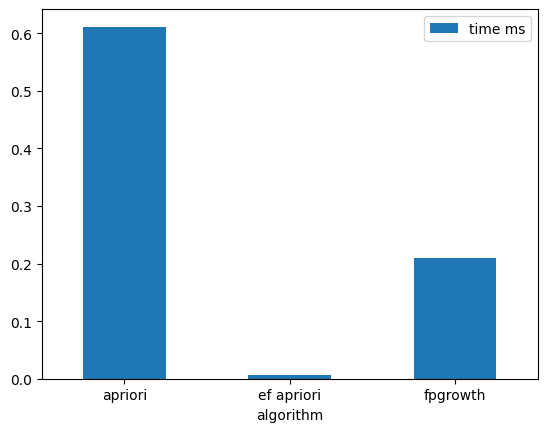

In [13]:
# graph

import matplotlib.pyplot as plt

df = pd.DataFrame({'algorithm':["apriori", "ef apriori", "fpgrowth"], 'time ms':[apriori_time, ef_apriori_time, fpgrowth_time]})
ax = df.plot.bar(x="algorithm", y='time ms', rot=0)